# Breast Cancer
- https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill
- Predict "Machining_Process"

## Setup

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Transform X with variance selector

In [11]:
from sklearn.feature_selection import VarianceThreshold

dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target
colsX = dataObj.feature_names

# Creating object
sel = VarianceThreshold(threshold=0)

# Fitting
sel.fit(X)

# Boolean
sup = sel.get_support()
cols_sel = colsX[sup]
print(f'Chosen columns:')
print('-'*30)
print(*cols_sel, sep=', ')

cols_rem = colsX[np.logical_not(sup)]
print(f'\nRemoved columns:')
print('-'*30)
print(*cols_rem, sep=', ')

X = sel.transform(X)
dfX = pd.DataFrame(data=X, columns=cols_sel)
display(dfX.head())

# Initialize dictionary to store selector
sel = {}

Chosen columns:
------------------------------
mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension

Removed columns:
------------------------------



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X_std = StandardScaler().fit_transform(X)

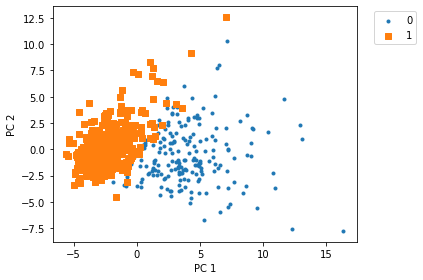

In [13]:
import seaborn as sns

X_std_pca = PCA(n_components=2).fit_transform(X_std)

n_cols = np.unique(y).shape[0]
colors = np.array(sns.color_palette(n_colors=n_cols))
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
markers = markers[:n_cols]

fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], color=c, label=l, marker=m)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

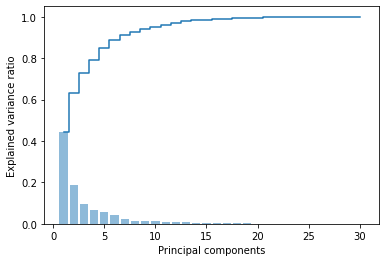

In [17]:
pca = PCA(n_components=30).fit(X_std)

plt.bar(range(1, pca.n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

paramSetAll = {
    "lr": {"clf": LR, "solver": "liblinear", "C": 10000, "max_iter": 100},
    "knn": {"clf":KNN, "n_neighbors": 5, "p": 1, "algorithm": "auto",},
    "dt": {"clf":DT, "criterion": "gini", "max_depth": 100},
    "rf": {"clf": RF,
        "criterion": "gini",
        "n_estimators": 50,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
}

In [19]:
def training(X_train, y_train, X_test, y_test):

    for name, paramsSet in paramSetAll.items():

        clf = paramsSet['clf']
        params = { k:v for k, v in paramsSet.items() if k != 'clf' }

        #clf = LogisticRegression()
        clf = clf(**params)

        # Training
        clf.fit(X_train, y_train)

        # Accuracy scores
        y_pred = clf.predict(X_train)
        acc_train = accuracy_score(y_train, y_pred)

        y_pred = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred)

        print(f'Classifier: {name:5s}, Train Acc: {acc_train:4.2f}, Test Acc: {acc_test:4.2f}')
    print(f"--------------------------------------------------")

In [20]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.shape)

(398, 30)


In [21]:
# No transformation
training(X_train_std, y_train, X_test_std, y_test)

Classifier: lr   , Train Acc: 1.00, Test Acc: 0.94
Classifier: knn  , Train Acc: 0.98, Test Acc: 0.95
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.91
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.95
--------------------------------------------------


In [22]:
for n_components in [15, 20, 25, 30]:
    print(f'Number of components: {n_components}')
    pca = PCA(n_components=n_components)
    X_train_std_trans = pca.fit_transform(X_train_std)
    X_test_std_trans = pca.transform(X_test_std)
    training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Number of components: 15
Classifier: lr   , Train Acc: 0.99, Test Acc: 0.94
Classifier: knn  , Train Acc: 0.99, Test Acc: 0.95
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.91
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.92
--------------------------------------------------
Number of components: 20
Classifier: lr   , Train Acc: 0.99, Test Acc: 0.92
Classifier: knn  , Train Acc: 0.99, Test Acc: 0.95
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.91
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.94
--------------------------------------------------
Number of components: 25
Classifier: lr   , Train Acc: 1.00, Test Acc: 0.94
Classifier: knn  , Train Acc: 0.98, Test Acc: 0.94
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.94
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.93
--------------------------------------------------
Number of components: 30
Classifier: lr   , Train Acc: 1.00, Test Acc: 0.94
Classifier: knn  , Train Acc: 0.98, Test Acc: 0.95
Classifier: dt   , Train Acc: 1.0

In [23]:
lda = LDA(n_components=1)
X_train_std_trans = lda.fit_transform(X_train_std, y_train)
X_test_std_trans = lda.transform(X_test_std)
training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Classifier: lr   , Train Acc: 0.99, Test Acc: 0.95
Classifier: knn  , Train Acc: 0.99, Test Acc: 0.95
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.95
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.95
--------------------------------------------------
